# Fashion-MNIST-CNN

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

## 패션 MNIST 데이터셋 임포트하기

In [13]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [17]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [18]:
test_images.shape

(10000, 28, 28)

## 데이터 전처리

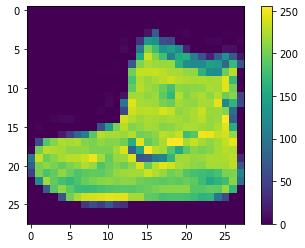

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

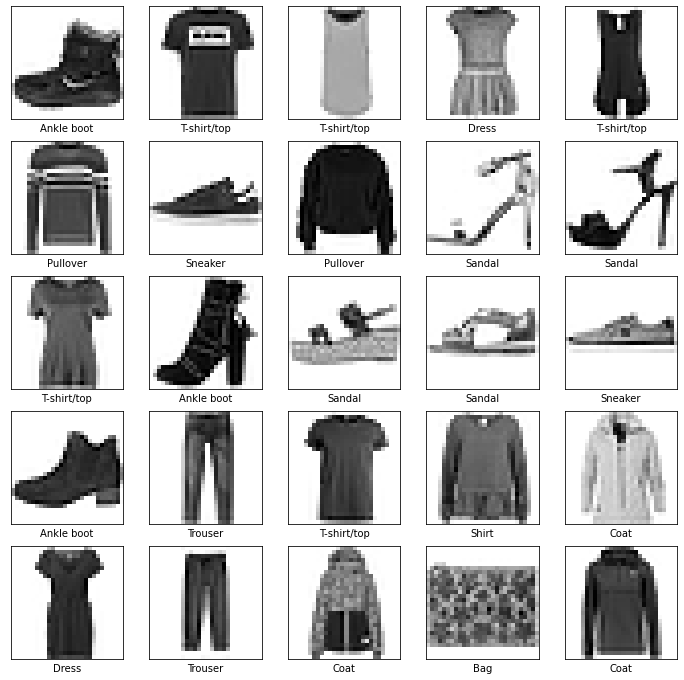

In [21]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## 모델 구성

In [25]:
# 손글씨 MNIST 모델과 동일하게
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), 
                              input_shape=(28, 28, 1), 
                              activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [27]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 51s 850us/sample - loss: 0.4956 - accuracy: 0.8247
Epoch 2/10
60000/60000 [==============================] - 50s 835us/sample - loss: 0.3321 - accuracy: 0.8817
Epoch 3/10
60000/60000 [==============================] - 51s 850us/sample - loss: 0.2850 - accuracy: 0.8964
Epoch 4/10
60000/60000 [==============================] - 51s 854us/sample - loss: 0.2543 - accuracy: 0.9071
Epoch 5/10
60000/60000 [==============================] - 51s 856us/sample - loss: 0.2307 - accuracy: 0.9150
Epoch 6/10
60000/60000 [==============================] - 51s 858us/sample - loss: 0.2108 - accuracy: 0.9229
Epoch 7/10
60000/60000 [==============================] - 49s 812us/sample - loss: 0.1937 - accuracy: 0.9295
Epoch 8/10
60000/60000 [==============================] - 52s 863us/sample - loss: 0.1818 - accuracy: 0.9316
Epoch 9/10
60000/60000 [==============================] - 52s 865us/sample - loss: 0.1666 - accuracy: 0.9

## 정확도 평가

In [28]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 2s - loss: 0.2147 - accuracy: 0.9258

테스트 정확도: 0.9258


## 예측 만들기

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions[0]

array([6.7204014e-14, 2.5257141e-17, 5.0878395e-16, 1.8886649e-14,
       2.1843754e-15, 1.6396940e-07, 2.8669118e-12, 8.2492491e-08,
       2.4536815e-13, 9.9999976e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
# 실제 값
test_labels[0]

9

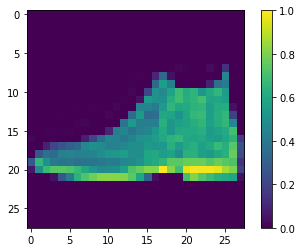

In [33]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Fashion MNIST 용 모델

In [34]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(filters=64, kernel_size=2,  
                               padding='same', activation='relu', 
                               input_shape=(28,28,1)))
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.MaxPooling2D(pool_size=2))
model2.add(keras.layers.Dropout(0.3))

model2.add(keras.layers.Flatten()) 
model2.add(keras.layers.Dense(256, activation='relu'))
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [35]:
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [36]:
model2.fit(x_train, y_train, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 465us/sample - loss: 0.5480 - accuracy: 0.8013
Epoch 2/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.3921 - accuracy: 0.8583
Epoch 3/10
60000/60000 [==============================] - 29s 480us/sample - loss: 0.3589 - accuracy: 0.8686
Epoch 4/10
60000/60000 [==============================] - 29s 484us/sample - loss: 0.3360 - accuracy: 0.8763
Epoch 5/10
60000/60000 [==============================] - 28s 473us/sample - loss: 0.3221 - accuracy: 0.8801
Epoch 6/10
60000/60000 [==============================] - 28s 463us/sample - loss: 0.3104 - accuracy: 0.8853
Epoch 7/10
60000/60000 [==============================] - 28s 466us/sample - loss: 0.3008 - accuracy: 0.8892
Epoch 8/10
60000/60000 [==============================] - 29s 476us/sample - loss: 0.2942 - accuracy: 0.8918
Epoch 9/10
60000/60000 [==============================] - 28s 470us/sample - loss: 0.2864 - accuracy: 0.8

In [37]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.2784 - accuracy: 0.9027

테스트 정확도: 0.9027
